In [2]:
lintr::use_lintr(type = "tidyverse")

In [3]:
# Libraries
library(tidyverse)
library(tidymodels)
library(tidytext)
library(doParallel)
library(vip)
library(lubridate)
library(broom)
library(scales)

# Chart Theme
theme_set(theme_bw() +
            theme(plot.title = element_text(size = 14, face = "bold"),
                  plot.subtitle = element_text(size = 10, face = "italic",
                                               colour = "grey50")))

# Loading Data
data <- read_csv("olympics.csv") %>%
      janitor::clean_names() %>%
      select(-x1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.1
✔ infer        1.0.3     ✔ workflows    1.1.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.2     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

In [4]:
data %>% glimpse()

Rows: 271,116
Columns: 15
$ id     <dbl> 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, …
$ name   <chr> "A Dijiang", "A Lamusi", "Gunnar Nielsen Aaby", "Edgar Lindenau…
$ sex    <chr> "M", "M", "M", "M", "F", "F", "F", "F", "F", "F", "M", "M", "M"…
$ age    <dbl> 24, 23, 24, 34, 21, 21, 25, 25, 27, 27, 31, 31, 31, 31, 33, 33,…
$ height <dbl> 180, 170, NA, NA, 185, 185, 185, 185, 185, 185, 188, 188, 188, …
$ weight <dbl> 80, 60, NA, NA, 82, 82, 82, 82, 82, 82, 75, 75, 75, 75, 75, 75,…
$ team   <chr> "China", "China", "Denmark", "Denmark/Sweden", "Netherlands", "…
$ noc    <chr> "CHN", "CHN", "DEN", "DEN", "NED", "NED", "NED", "NED", "NED", …
$ games  <chr> "1992 Summer", "2012 Summer", "1920 Summer", "1900 Summer", "19…
$ year   <dbl> 1992, 2012, 1920, 1900, 1988, 1988, 1992, 1992, 1994, 1994, 199…
$ season <chr> "Summer", "Summer", "Summer", "Summer", "Winter", "Winter", "Wi…
$ city   <chr> "Barcelona", "London", "Antwerpen", "Paris", "Calgary", "Calgar…
$ sport  <chr>

### Total Gold Medals by Country

In [5]:
data %>%
    mutate(medal = ifelse(is.na(medal), "None", medal)) %>%
    group_by(team) %>%
    count(medal) %>%
    ungroup() %>%
    filter(medal == "Gold") %>%
    slice_max(order_by = n, n = 10)

team,medal,n
<chr>,<chr>,<int>
United States,Gold,2474
Soviet Union,Gold,1058
Germany,Gold,679
Italy,Gold,535
Great Britain,Gold,519
France,Gold,455
Sweden,Gold,451
Hungary,Gold,432
Canada,Gold,422


### Average Age by Sport and Sex

In [6]:
data %>%
    add_count(sport) %>%
    filter(n > 100) %>%
    group_by(sex, sport) %>%
    summarise(age = mean(age, na.rm = T)) %>%
    ungroup() %>%
    pivot_wider(names_from = sex, values_from = age) %>%
    drop_na() %>%
    mutate(delta = M - F) %>%
    arrange(-delta)

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sport,F,M,delta
<chr>,<dbl>,<dbl>,<dbl>
Gymnastics,19.23275,24.65348,5.4207312
Shooting,29.11905,34.25435,5.1353039
Sailing,26.69838,30.90662,4.2082436
Skeleton,27.56061,30.97710,3.4164932
Golf,27.33824,30.25150,2.9132617
Figure Skating,20.81255,23.71827,2.9057181
Curling,29.97297,32.73859,2.7656162
Fencing,26.34110,29.07767,2.7365638
Archery,26.50846,29.08327,2.5748089


### Average Weight by Sport and Sex

In [7]:
data %>% 
  group_by(sport, sex) %>% 
  summarise(weight = mean(weight, na.rm = T),
            n = n()) %>% 
  filter(n > 30) %>% 
  select(-n) %>% 
  pivot_wider(names_from = sex, values_from = weight) %>% 
  drop_na() %>% 
  mutate(delta = M - `F`) %>% 
  arrange(desc(delta))

`summarise()` has grouped output by 'sport'. You can override using the
`.groups` argument.


sport,F,M,delta
<chr>,<dbl>,<dbl>,<dbl>
Rugby Sevens,66.62838,91.00662,24.378244
Beach Volleyball,68.35094,89.51282,21.161877
Skeleton,61.00000,82.01835,21.018349
Handball,68.87685,89.38791,20.511063
Figure Skating,49.86104,69.59164,19.730605
Curling,62.88835,81.46569,18.577337
Ice Hockey,65.71286,83.77559,18.062728
Basketball,73.68517,91.68353,17.998359
Volleyball,69.33378,86.92593,17.592147


### Building a Random Forest Model with Tidymodels

In [8]:
# Making splits and folds
dt_split <- data %>%
    select(sex, age, height, weight, sport, medal, year) %>%
    filter(year >= 2010) %>%
    select(-year) %>%
    drop_na(weight) %>%
    mutate(medal = ifelse(is.na(medal), "No Medal", medal)) %>%
    initial_split(prop = 0.75)

dt_train <- training(dt_split)
dt_test <- testing(dt_split)

folds <- vfold_cv(dt_train, v = 3)

In [9]:
# Recipe
en_rec <- recipe(weight ~ ., data = dt_train) %>% 
  step_impute_median %>% 
  step_impute_mode(all_nominal_predictors()) %>% 
  step_impute_mean(all_numeric_predictors()) %>% 
  step_normalize(all_numeric_predictors()) %>% 
  step_dummy(all_nominal_predictors(), one_hot = TRUE)

en_rec %>% prep() %>% juice() %>% glimpse()

Rows: 26,307
Columns: 58
$ age                             <dbl> 0.15630191, 0.33997255, 1.07465508, 0.…
$ height                          <dbl> 1.39068978, 1.75865766, 1.02272190, 2.…
$ weight                          <dbl> 117, 91, 133, 102, 90, 59, 120, 68, 81…
$ sex_F                           <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,…
$ sex_M                           <dbl> 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,…
$ sport_Alpine.Skiing             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ sport_Archery                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ sport_Athletics                 <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ sport_Badminton                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ sport_Basketball                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ sport_Beach.Volleyball          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ sport_Biathlon                  <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ sport_Bobslei

In [10]:
# Workflow
en_wflow <- workflow() %>% 
  add_model(
    linear_reg(mixture = tune(), penalty = tune()) %>% 
      set_engine("glmnet") %>% 
      set_mode("regression")
  ) %>% 
  add_recipe(en_rec)

en_wflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_impute_median()
• step_impute_mode()
• step_impute_mean()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Linear Regression Model Specification (regression)

Main Arguments:
  penalty = tune()
  mixture = tune()

Computational engine: glmnet 


Hyperparameter tuning: Took ages somehow (3 min in sklearn vs >1h in Tidymodels, what is wrong?)

In [12]:
start_time <- Sys.time()

unregister_dopar <- function() {
    env <- foreach:::.foreachGlobals
    rm(list = ls(name = env), pos = env)
}

cl <- makePSOCKcluster(7)
registerDoParallel(cl)

en_tune <- tune_grid(en_wflow,
    resamples = folds,
    grid = crossing(
        mixture = seq(0, 1, length.out = 5),
        penalty = c(1e-5, 1e-4, 1e-3, 1e-2, 1e-1, seq(1, 100, length.out = 10))
    )
)

stopCluster(cl)
unregister_dopar()

end_time <- Sys.time()
end_time - start_time

Time difference of 20.53171 secs

In [14]:
en_tune %>% show_best(metric = "rsq")

penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1e-05,0.50,rsq,standard,0.7369669,3,0.002221140,Preprocessor1_Model31
1e-04,0.50,rsq,standard,0.7369669,3,0.002221140,Preprocessor1_Model32
1e-03,0.50,rsq,standard,0.7369669,3,0.002221140,Preprocessor1_Model33
1e-02,0.50,rsq,standard,0.7369669,3,0.002221140,Preprocessor1_Model34
1e-05,0.25,rsq,standard,0.7369666,3,0.002232603,Preprocessor1_Model16


Looking slightly better than Python, and tuning times are a lot faster.

In [15]:
en_final_fit <- en_wflow %>%
    finalize_workflow(select_best(en_tune, metric = "rsq")) %>%
    last_fit(dt_split)

In [16]:
# Model metrics
eval_metrics <- metric_set(rsq, mae, mape)

en_final_fit %>% 
  collect_predictions() %>% 
  eval_metrics(truth = weight, estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7350223
mae,standard,5.3154487
mape,standard,7.4493843


Actually slightly worse metrics than in Python's `sklearn`, might be due to the split and be statistically insignificant. Lastly, make a visualisation:

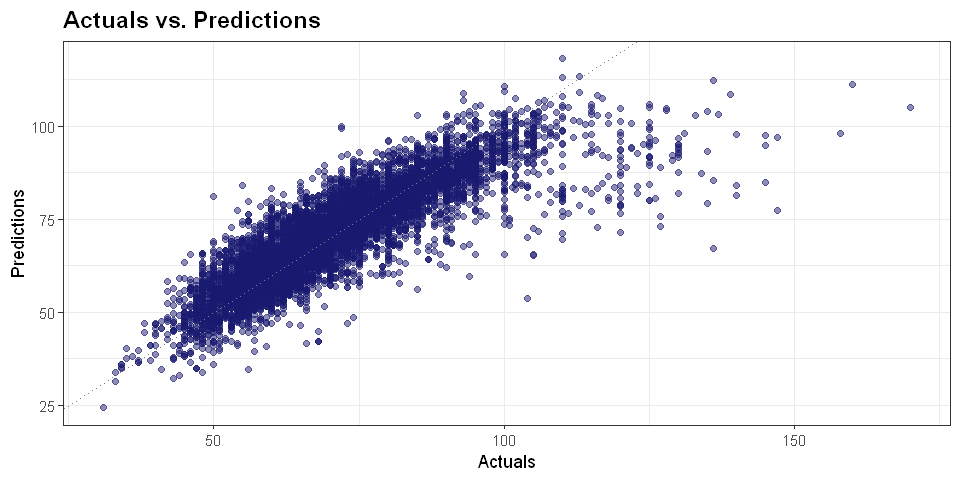

In [19]:
options(repr.plot.width=8, repr.plot.height=4)

en_final_fit %>% 
  collect_predictions() %>% 
  ggplot(aes(x = weight, y = .pred)) +
  geom_point(colour = "midnightblue", alpha = 0.5) +
  geom_abline(colour = "grey50", lty = "dotted") +
  labs(title = "Actuals vs. Predictions",
       y = "Predictions",
       x = "Actuals")